In [9]:
# importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_us = df[df['job_country'] == 'United States']

In [ ]:
df_skills = df_us.explode('job_skills')
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [ ]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [ ]:
type(df_skills_count)

pandas.core.series.Series

In [ ]:
df_skills_count = df_skills_count.reset_index(name='skill_count')

In [ ]:
type(df_skills_count)

pandas.core.frame.DataFrame

In [ ]:
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [ ]:
df_skills_count.sort_values('skill_count', ascending=False, inplace=True)
df_skills_count


,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [ ]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
# tolist() is to convert to list from array

In [ ]:
job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

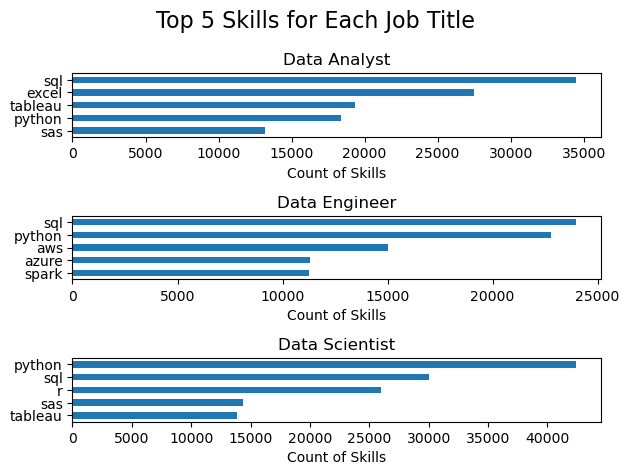

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title]. head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].set_xlabel('Count of Skills')
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()  # To display the highest count at the top
    ax[i].legend().remove()  # Remove legend for cleaner look


fig.suptitle('Top 5 Skills for Each Job Title', fontsize=16)
fig.tight_layout()
plt.show()

In [ ]:
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='jobs_total').sort_values('jobs_total', ascending=False)
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [ ]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')
df_skills_perc['skill_percentage'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100
df_skills_perc


,job_skills,job_title_short,skill_count,jobs_total,skill_percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


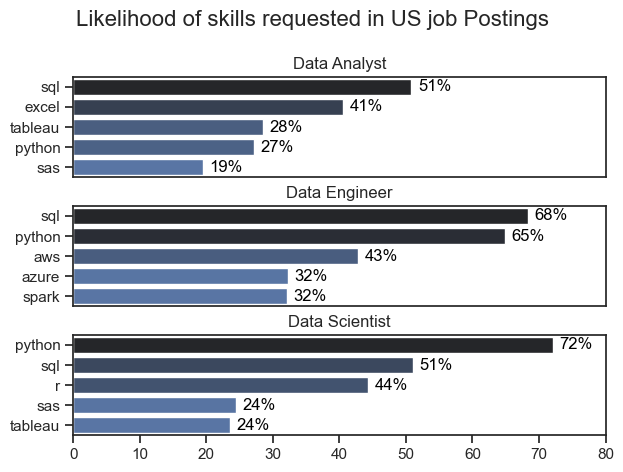

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')  # Set a clean style for the plots
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title]. head(5)
    # df_plot.plot(kind='barh', x='job_skills', y='skill_percentage', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percentage', y='job_skills', ax=ax[i], hue='skill_count',palette='dark:b_r')
    
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(job_title)
    ax[i].set_xlim(0, 80)  # Set x-axis limits to 0-100% for better comparison
    ax[i].get_legend().remove()  # Remove legend for cleaner look

    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v + 1, n, f'{v:.0f}%', color='black', va='center')  # Add percentage labels to bars
    if i != len(job_titles) - 1:  # Remove x-ticks for all but the last plot
        ax[i].set_xticks([])
    # ax[i].set_xticks(range(0, 81, 20))  # Set x-ticks at intervals of 20%
    # ax[i].invert_yaxis()  # To display the highest count at the top
    ax[i].legend().remove()  # Remove legend for cleaner look
fig.suptitle('Likelihood of skills requested in US job Postings', fontsize=16)
fig.tight_layout(h_pad=0.5) # Adjust the vertical spacing between subplots 
plt.show()